In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

path_to_file = "data/cifar-10-python/cifar-10-batches-py/"

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [3]:
def load(file):
    dictTrain = unpickle(file + "data_batch_1")
    dataTrain = dictTrain['data']
    labelTrain = dictTrain['labels']
    for i in range(2,6):
        dictTrain = unpickle(file+"data_batch_"+str(i))
        dataTrain = np.vstack([dataTrain, dictTrain['data']])
        labelTrain = np.hstack([labelTrain, dictTrain['labels']])
    dictTest = unpickle(file + "test_batch")
    dataTest = dictTest['data']
    labelTest = dictTest['labels']
    labelTest = np.array(labelTest)
    return dataTrain, labelTrain, dataTest, labelTest

In [4]:
class KNN(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def compute_distances_L1(self, X_test):
        dists = np.zeros((X_test.shape[0], self.X_train.shape[0]))

        for i in range(X_test.shape[0]):
            dists[i] = np.sum( np.abs(self.X_train- X_test[i]), axis=1)


        return dists
    def compute_distances_L2(self, X_test):
        dists = np.zeros((X_test.shape[0], self.X_train.shape[0]))

        value_2xy = np.multiply(X_test.dot(self.X_train.T), -2)
        value_x2 = np.sum(np.square(X_test), axis=1, keepdims=True) #Keep its dimensions unchanged
        value_y2 = np.sum(np.square(self.X_train), axis=1)
        dists = value_2xy + value_x2 + value_y2
        return dists

    def predict_label(self, dists, k):
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):
            # Take the first K labels
            closest_y = self.y_train[np.argsort(dists[i, :])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))

        return y_pred

    def predict(self, X_test, k, L):
        if(L==1):
            dists = self.compute_distances_L1(X_test)
        else:
            dists = self.compute_distances_L2(X_test)
        y_pred = self.predict_label(dists, k)
        return y_pred

def Cross_validation(X_train, y_train, ltype):
    num_folds = 5
    k_choices = [1, 2, 4, 8, 16, 32, 64, 128, 50, 100]
    k_accuracy = {}

    # Divide the data set into 5 parts, X_train_folds ([],[],[],[],[]) There are 5 narrays in the list
    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)

    print("length of x_train_folds", len(X_train_folds))
    print("X_train shape", type(X_train[0]))
    print("X_train len", X_train_folds[0].shape)
    # Calculate each K value

    for k in k_choices:
        k_accuracy[k] = []
        # Calculate the correct rate of each data set as the test set for each K value
        for index in range(num_folds):
            # Build a data set
            X_te = X_train_folds[index]
            y_te = y_train_folds[index]

            X_tr = np.reshape( np.array(X_train_folds[:index] + X_train_folds[index + 1:]),
                                (int(X_train.shape[0] * (num_folds - 1) / num_folds), -1) )
            y_tr = np.reshape(y_train_folds[:index] + y_train_folds[index + 1:],
                              int(X_train.shape[0] * (num_folds - 1) / num_folds))
            # forecast result
            classify = KNN()
            classify.train(X_tr, y_tr)
            y_te_pred = classify.predict(X_te, k, ltype)
            accuracy = np.mean(y_te_pred == y_te)
            k_accuracy[k].append(accuracy)

    for k, accuracylist in k_accuracy.items():
        for accuracy in accuracylist:
            print("k = %d, accuracy = %.3f" % (k, accuracy))

    # Visual K value effect
    for k in k_choices:
        accuracies = k_accuracy[k]
        plt.scatter([k] * len(accuracies), accuracies)
    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_accuracy.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_accuracy.items())])
    # Construct an error bar graph based on the mean and variance
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()

In [5]:
print("L1 Cross Validation")

L1 Cross Validation


length of x_train_folds 5
X_train shape <class 'numpy.ndarray'>
X_train len (200, 3072)
k = 1, accuracy = 0.135
k = 1, accuracy = 0.155
k = 1, accuracy = 0.235
k = 1, accuracy = 0.210
k = 1, accuracy = 0.245
k = 2, accuracy = 0.115
k = 2, accuracy = 0.145
k = 2, accuracy = 0.210
k = 2, accuracy = 0.150
k = 2, accuracy = 0.205
k = 4, accuracy = 0.135
k = 4, accuracy = 0.135
k = 4, accuracy = 0.210
k = 4, accuracy = 0.165
k = 4, accuracy = 0.205
k = 8, accuracy = 0.125
k = 8, accuracy = 0.135
k = 8, accuracy = 0.205
k = 8, accuracy = 0.195
k = 8, accuracy = 0.150
k = 16, accuracy = 0.125
k = 16, accuracy = 0.130
k = 16, accuracy = 0.225
k = 16, accuracy = 0.210
k = 16, accuracy = 0.190
k = 32, accuracy = 0.110
k = 32, accuracy = 0.140
k = 32, accuracy = 0.210
k = 32, accuracy = 0.205
k = 32, accuracy = 0.205
k = 64, accuracy = 0.090
k = 64, accuracy = 0.130
k = 64, accuracy = 0.160
k = 64, accuracy = 0.170
k = 64, accuracy = 0.150
k = 128, accuracy = 0.090
k = 128, accuracy = 0.125
k = 1

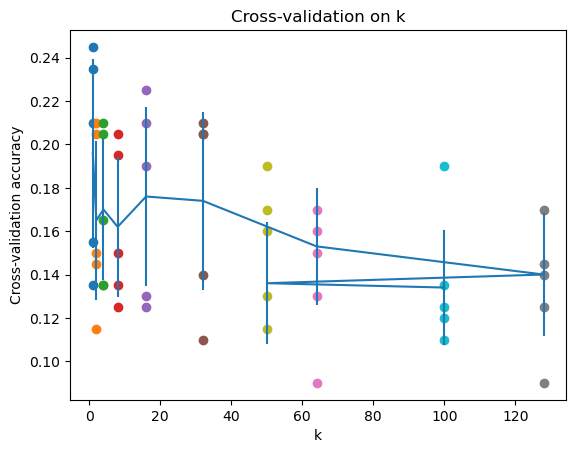

In [6]:
dataTrain, labelTrain, dataTest, labelTest = load(path_to_file)
Cross_validation(dataTrain[:1000,:], labelTrain[:1000], 1)

L2 Cross Validation
length of x_train_folds 5
X_train shape <class 'numpy.ndarray'>
X_train len (200, 3072)
k = 1, accuracy = 0.110
k = 1, accuracy = 0.055
k = 1, accuracy = 0.115
k = 1, accuracy = 0.140
k = 1, accuracy = 0.125
k = 2, accuracy = 0.070
k = 2, accuracy = 0.105
k = 2, accuracy = 0.110
k = 2, accuracy = 0.140
k = 2, accuracy = 0.085
k = 4, accuracy = 0.070
k = 4, accuracy = 0.105
k = 4, accuracy = 0.110
k = 4, accuracy = 0.140
k = 4, accuracy = 0.085
k = 8, accuracy = 0.070
k = 8, accuracy = 0.105
k = 8, accuracy = 0.110
k = 8, accuracy = 0.140
k = 8, accuracy = 0.085
k = 16, accuracy = 0.070
k = 16, accuracy = 0.105
k = 16, accuracy = 0.105
k = 16, accuracy = 0.060
k = 16, accuracy = 0.085
k = 32, accuracy = 0.070
k = 32, accuracy = 0.105
k = 32, accuracy = 0.110
k = 32, accuracy = 0.060
k = 32, accuracy = 0.085
k = 64, accuracy = 0.075
k = 64, accuracy = 0.105
k = 64, accuracy = 0.105
k = 64, accuracy = 0.060
k = 64, accuracy = 0.085
k = 128, accuracy = 0.075
k = 128, ac

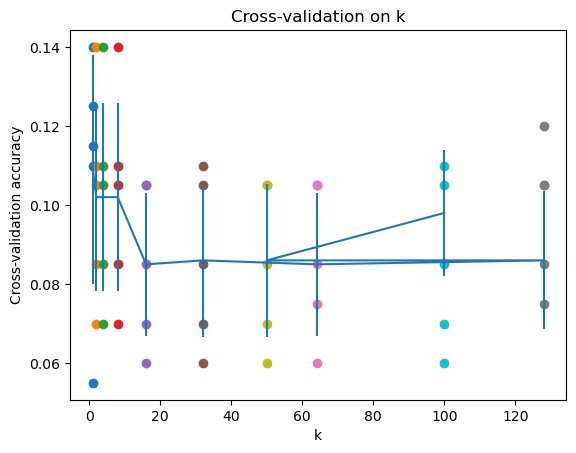

In [7]:
print("L2 Cross Validation")
Cross_validation(dataTrain[:1000,:], labelTrain[:1000], 2)